In [1]:
import obspy

from numpy import arange
from andbro__makeplot_trace_spectrum import __makeplot_trace_and_spectrum


In [2]:
path = "/home/andbro/Documents/ROMY/data/event_japan/"

1 Trace(s) in Stream:
BW.ROMY.10.BJZ | 2021-02-13T14:00:00.005800Z - 2021-02-13T15:00:00.005800Z | 20.0 Hz, 72001 samples


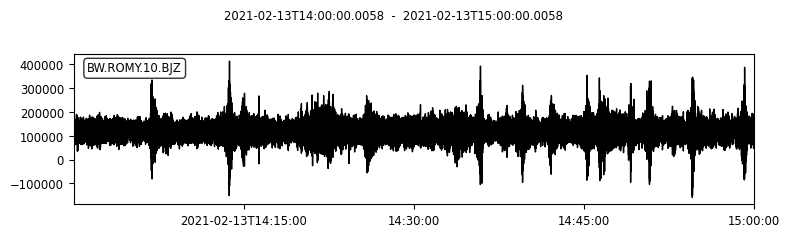

1 Trace(s) in Stream:
BW.ROMY..BJV | 2021-02-13T13:59:59.993999Z - 2021-02-13T14:59:59.993999Z | 20.0 Hz, 72001 samples


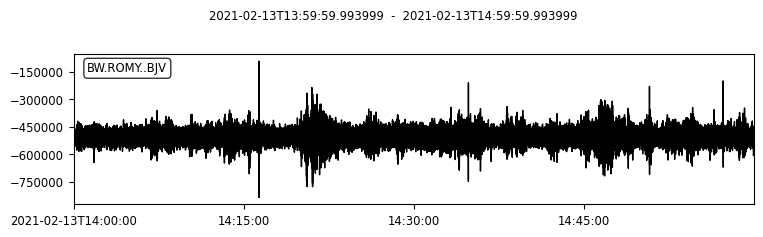

1 Trace(s) in Stream:
BW.RLAS..BJZ | 2021-02-13T13:59:57.159249Z - 2021-02-13T15:00:09.309249Z | 20.0 Hz, 72244 samples


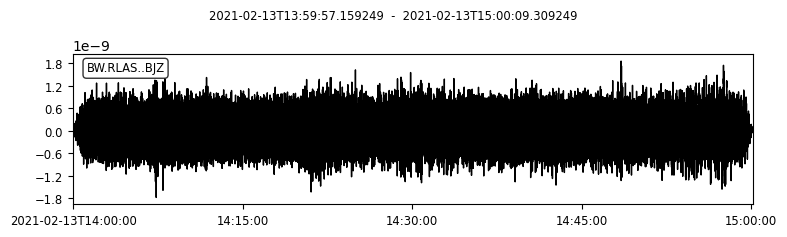

In [3]:

st1 = obspy.read(path+"ROMY_BJZ_2021-02-13.mseed") # obtained via get_mseed archive
st2 = obspy.read(path+"ROMY_BJV_2021-02-13.mseed") # obtained via get_mseed archive
st3 = obspy.read(path+"RLAS_BJZ_2021-02-13.mseed") # obtained via get_mseed online


for st in [st1, st2, st3]:
    print(st)
    st.plot();

In [4]:
st1_inv = obspy.read_inventory(path+'ROMY_BJZ.xml')
st2_inv = obspy.read_inventory(path+'ROMY_BJV.xml')
st3_inv = obspy.read_inventory(path+'RLAS_BJZ.xml')

st1.remove_response(st1_inv)
st2.remove_response(st2_inv)
# st3.remove_response(st3_inv)

1 Trace(s) in Stream:
BW.ROMY..BJV | 2021-02-13T13:59:59.993999Z - 2021-02-13T14:59:59.993999Z | 20.0 Hz, 72001 samples

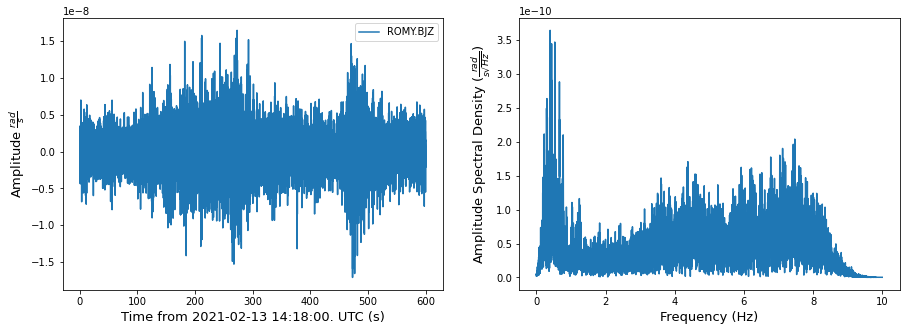

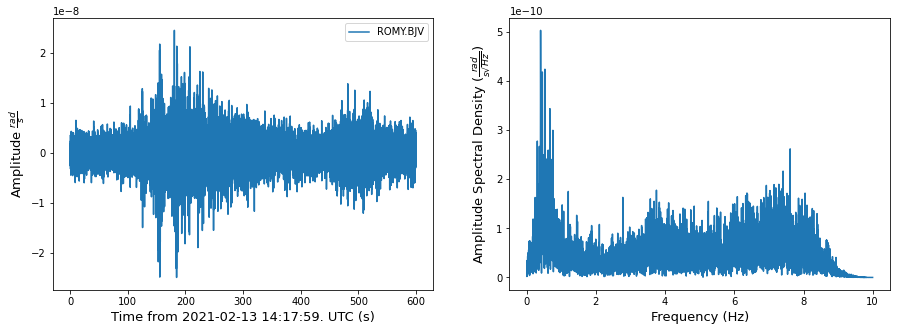

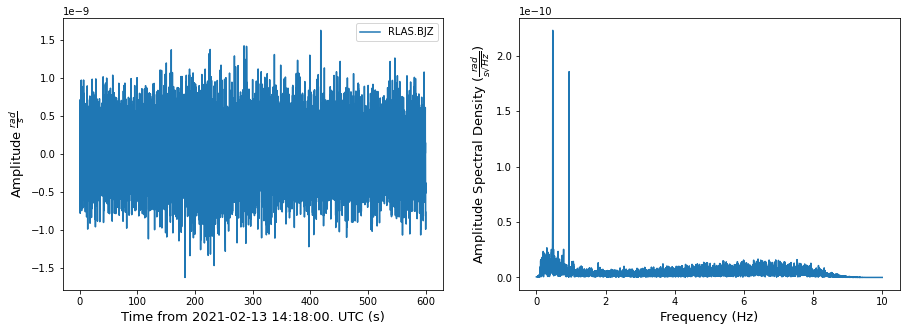

In [5]:
tbeg = obspy.UTCDateTime("2021-02-13 14:18")
tend = obspy.UTCDateTime("2021-02-13 14:28")

st1.trim(starttime=tbeg, endtime=tend)
st2.trim(starttime=tbeg, endtime=tend)
st3.trim(starttime=tbeg, endtime=tend)

for st in [st1, st2, st3]:
    
    timeline = arange(0, st[0].stats.npts*st[0].stats.delta, st[0].stats.delta)

    __makeplot_trace_and_spectrum(st)

In [6]:
f_lower, f_upper = 0.01, 1.0

st1.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True)
st2.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True)
st3.filter('bandpass', freqmin=f_lower, freqmax=f_upper, corners=4, zerophase=True)

1 Trace(s) in Stream:
BW.RLAS..BJZ | 2021-02-13T14:18:00.009249Z - 2021-02-13T14:28:00.009249Z | 20.0 Hz, 12001 samples

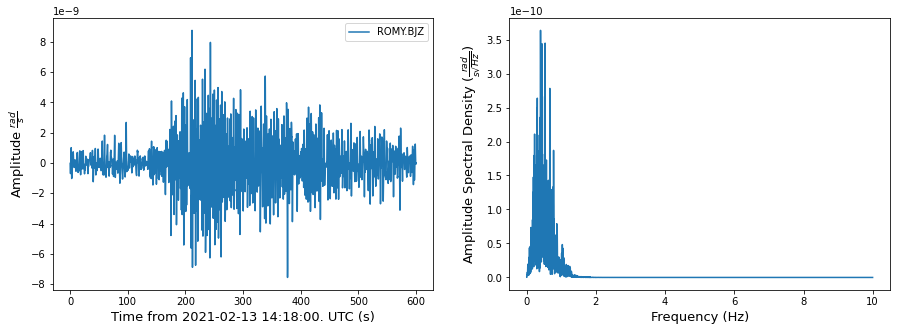

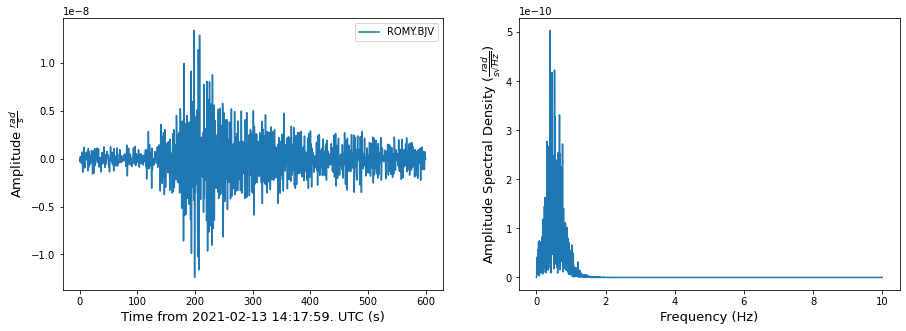

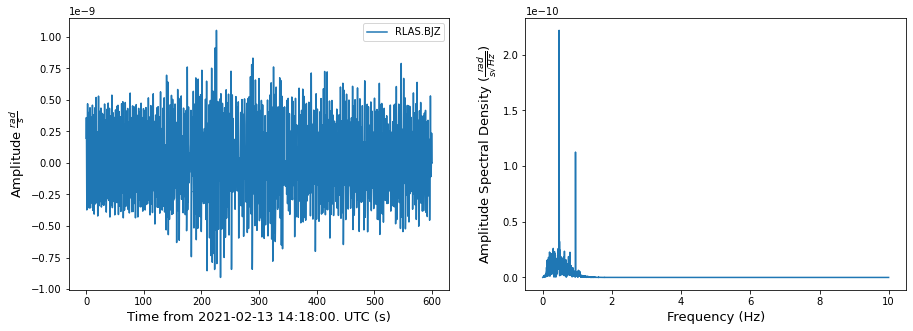

In [7]:

for st in [st1, st2, st3]:
    
    timeline = arange(0, st[0].stats.npts*st[0].stats.delta, st[0].stats.delta)

    __makeplot_trace_and_spectrum(st)

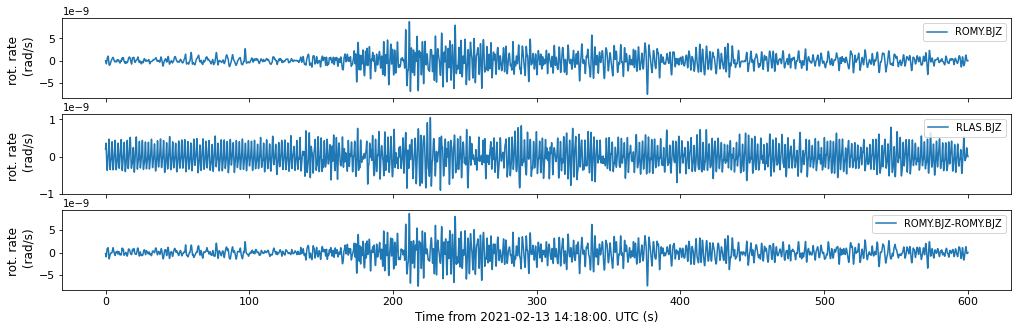

In [9]:
from andbro__makeplot_compare2traces import __makeplot_compare2traces

__makeplot_compare2traces(st1, st3);